# Corporate Credit Rating Prediction

Is it possible to predict the credit rating of a company with its financial Ratios?



## The Dataset

- **Liquidity Measurement Ratios**: currentRatio, quickRatio, cashRatio, daysOfSalesOutstanding, daysOfInventoryOutstanding, operatingCycle, daysOfPayablesOutstanding, cashConversionCycle

- **Profitability Indicator Ratios**: grossProfitMargin, operatingProfitMargin, pretaxProfitMargin, netProfitMargin, effectiveTaxRate, returnOnAssets, returnOnEquity, returnOnCapitalEmployed, netIncomePerEBT, ebtPerEbit, ebitPerRevenue

- **Debt Ratios**: debtRatio, debtEquityRatio, longTermDebtToCapitalization, totalDebtToCapitalization, interestCoverage, cashFlowToDebtRatio, companyEquityMultiplier

- **Operating Performance Ratios**: receivablesTurnover, payablesTurnover, inventoryTurnover, fixedAssetTurnover, assetTurnover Cash Flow Indicator Ratios: operatingCashFlowPerShare, freeCashFlowPerShare, cashPerShare, payoutRatio, operatingCashFlowSalesRatio, freeCashFlowOperatingCashFlowRatio, cashFlowCoverageRatios, shortTermCoverageRatios, capitalExpenditureCoverageRatio, dividendPaidAndCapexCoverageRatio, dividendPayoutRatio, 


#### Import Libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

## Data Exploration

In [111]:
df_rating = pd.read_csv('data/rating_dataframe.csv')

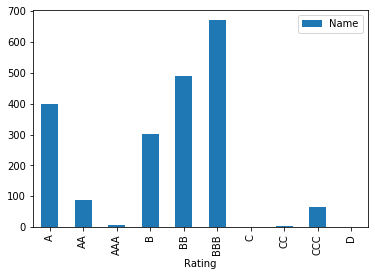

In [112]:
df_rating_summary = df_rating.groupby('Rating').count().reset_index()
df_rating_summary.plot.bar(x='Rating', y='Name')

It is better to join all the A's together. 

In [113]:
df_rating.loc[df_rating['Rating'] == 'AA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'AAA','Rating'] = 'A' 
df_rating.loc[df_rating['Rating'] == 'CC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'CCC','Rating'] = 'C' 
df_rating.loc[df_rating['Rating'] == 'D','Rating'] = 'C'

### EDA

In [114]:
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover,payoutRatio
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718,-0.085374
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588,40.443603
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850,-1735.047170
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912,0.000000
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722,0.212845
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892,0.465593
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400,412.136640


In [115]:
skewValue = df_rating.skew(axis=0)
skewValue

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

#### Log conversion

In [116]:
from sklearn import preprocessing

In [117]:
columns = df_rating.columns[6:]

In [118]:
min_max_scaler = preprocessing.MinMaxScaler()

for c in columns:
    
    float_array = df_rating[[c]].values.astype(float)
    min_max_scaler = preprocessing.MinMaxScaler()
    scaled_array = min_max_scaler.fit_transform(float_array)
    df_rating[c] = scaled_array
    df_rating[c + 'log'] = df_rating[c].apply(np.log)

#### Plot Distributions 

In [122]:
df_rating.colors = 'a'
df_rating.loc[df_rating['Rating'] == 'A', 'color'] = 'r'
df_rating.loc[df_rating['Rating'] == 'B', 'color'] = 'g'
df_rating.loc[df_rating['Rating'] == 'BB', 'color'] = 'b'
df_rating.loc[df_rating['Rating'] == 'BBB','color'] = 'y'
df_rating.loc[df_rating['Rating'] == 'C', 'color'] = 'm'

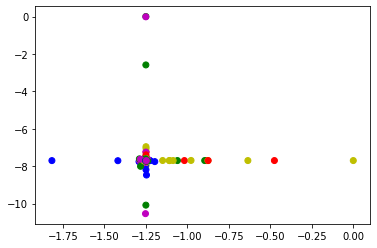

In [131]:
plt.scatter(df_rating.ebitPerRevenuelog, df_rating.returnOnEquitylog, c= df_rating.color)

# PCA

In [ ]:
df_rating.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
features = df_rating.columns[6:]
# Separating out the features
x = df_rating.loc[:, features].values
# Separating out the target
y = df_rating.loc[:,['Rating']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pca1', 'pca2','pca3', 'pca4', 'pca5'])

In [ ]:
finalDf = pd.concat([principalDf, df_rating[['Rating']]], axis = 1)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(df_rating.Rating))
colors = ['r', 'g', 'b','y', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Rating'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pca2'], 
               finalDf.loc[indicesToKeep, 'pca3'], 
               c = color, 
               s = 50)

ax.legend(targets)
ax.grid()

In [ ]:
sum(pca.explained_variance_ratio_)

In [ ]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

#### Train and Test

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), finalDf.iloc[:,5]

In [ ]:
X = X.apply(np.log)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X_train)

In [ ]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [ ]:
model = clf.fit(X_std, y_train)

# Random Forest

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df_rating.iloc[:,6:], df_rating.iloc[:,0]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))